In [26]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

def write_out(ob, name):
    d = json.dumps(ob.tolist())
    out = open(name+".json","w")
    out.write(d)
    out.close()
    
f = open('LargeTrain.csv', 'r')
column = f.readline().split(',')
X = []
y = []

for i in f.readlines():
    X.append(i.split(',')[:-1])
    y.append(i.split(',')[-1].strip())


X = np.asarray(X)
y = np.asarray(y)


# Build a classification task using 3 informative features
'''
X, y = make_classification(n_samples=10,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
'''
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=10,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


write_out(indices,"indices")
write_out(importances,"importances")



Feature ranking:
TOP 1. feature IsValidCodePage (0.038853)
TOP 2. feature Img86 (0.024759)
TOP 3. feature Img48 (0.022068)
TOP 4. feature _onexit (0.021317)
TOP 5. feature GetIconInfo (0.021091)
TOP 6. feature ent_p_7 (0.020480)
TOP 7. feature Img47 (0.019161)
TOP 8. feature Img10 (0.018738)
TOP 9. feature GetSystemTime (0.016330)
TOP 10. feature Img33 (0.016048)


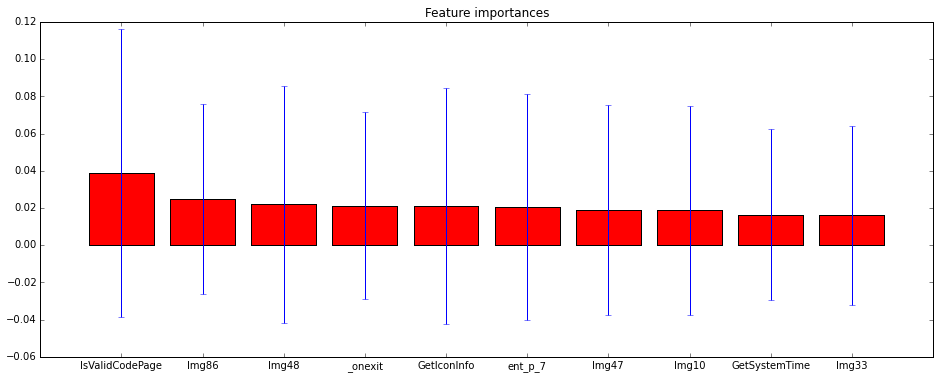

In [60]:
def input_json(file_name):
    f = open(file_name+".json","r")
    data = json.loads(f.readline())
    return data

v = 10
indices = np.asarray(input_json("indices")[:v])
importances = np.asarray(input_json("importances"))
column = np.asarray(column)
# Print the feature ranking
print("Feature ranking:")

for f in range(v):
    print("TOP %d. feature %s (%f)" % (f + 1, column[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(v), importances[indices], 
       color="r", yerr=std[indices], align="center")
plt.xticks(range(v), column[indices])
plt.xlim([-1, v])
plt.show()

In [88]:
#not used feature
print("Not used feature")

all_indices = np.asarray(input_json("indices"))
for f in range(len(all_indices)):
    if importances[indices[f]] == np.float64(0.0):
        print("feature %s (%f)" % ( column[indices[f]], importances[indices[f]]))

Not used feature
feature FindNextFileW (0.000000)
feature SetWindowExtEx (0.000000)
feature __vbaStrVarCopy (0.000000)
feature __vbaVarTstNe (0.000000)
feature __vbaGet3 (0.000000)
feature wcscmp (0.000000)
feature __vbaI4ErrVar (0.000000)
feature connect (0.000000)
feature Shell_NotifyIconA (0.000000)
feature HttpSendRequestA (0.000000)
feature recv (0.000000)
feature UINT (0.000000)
feature GetTimeFormatA (0.000000)
feature FormatMessageW (0.000000)
feature GetStartupInfoW (0.000000)
feature __vbaVarZero (0.000000)
feature GlobalGetAtomNameA (0.000000)
feature BringWindowToTop (0.000000)
feature RegQueryValueA (0.000000)
feature LoadLibraryExW (0.000000)
feature __vbaInStrVar (0.000000)
feature OpenPrinterA (0.000000)
feature wcscpy (0.000000)
feature EnumChildWindows (0.000000)
feature CreateRectRgn (0.000000)
feature BASS (0.000000)
feature CLSIDFromProgID (0.000000)
feature ent_q_diff_block_3_16 (0.000000)
feature ent_q_diff_block_1_1 (0.000000)
feature ent_q_diff_block_1_2 (0.000